In [3]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import joblib

In [5]:
# reference:   https://doi.org/10.1089/cmb.2006.13.745

def muller_brown_potential(x,y,perturb=None):  #perturb is a list [coeff_x,coeff_y]
    
    #define constants
    A=[-200,-100,-170,15];
    a=[-1,-1,-6.5,0.7];
    b=[0,0,11,0.6];
    c=[-10,-10,-6.5,0.7];
    
    x0=[1,0,-0.5,-1];
    y0=[0,0.5,1.5,1];
    
    #sum over k=1 to k=4
    z=0
    for k in range(4):
        z+=A[k]*np.exp( a[k]*(x-x0[k])**2 + b[k]*(x-x0[k])*(y-y0[k])+c[k]*(y-y0[k])**2)

    #introduce 1st order perturbation 
    if perturb != None:
        z+=perturb[0]*x+perturb[1]*y
    return z   


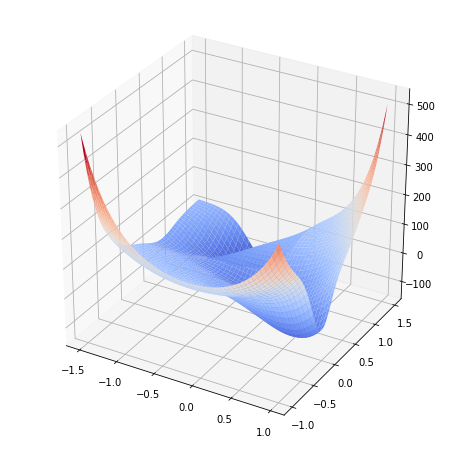

In [4]:
#plot unperturbed potential in 3d
fig=plt.figure(figsize=(8,8))
ax=fig.add_subplot(111,projection="3d")

X=np.arange(-1.5,1,1/100)
Y=np.arange(-1,1.5,1/100)
X, Y = np.meshgrid(X, Y)
Z=np.array(muller_brown_potential(np.ravel(X), np.ravel(Y)))
Z = Z.reshape(X.shape)
ax.plot_surface(X,Y,Z,cmap=cm.coolwarm)

(11835,)
(11835,)
(148165,)
(148165,)
(11835, 2)
(160000, 2)
(11835, 2)
(160000, 2)
(160000, 2)


<Figure size 432x288 with 0 Axes>

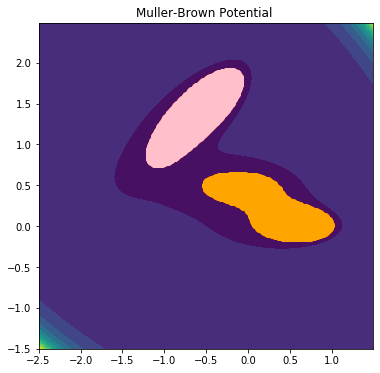

In [202]:
# plot perturb potential 
plt.clf()
fig=plt.figure(figsize=(6,6))
X=np.arange (-2.5,1.5,1/100) ; Y=np.arange(-1.5,2.5,1/100)
X, Y = np.meshgrid(X, Y)
Z=np.array(muller_brown_potential(np.ravel(X), np.ravel(Y)))
Z = Z.reshape(X.shape)
ax=fig.add_subplot(111)
ax.contourf(X, Y, Z, 10, linestyles="solid")
ax.set_title('Muller-Brown Potential ')


# compute training set 
dc_index=np.where(Z <-60) # define domain and complement 
d_index=np.where(Z>=-60)
x_dc=X[0][dc_index[1]]
y_dc=Y[:,0][dc_index[0]]
print(np.shape(x_dc)); print(np.shape(y_dc))
x_d=X[0][d_index[1]]
y_d=Y[:,0][d_index[0]]
print(np.shape(x_d)); print(np.shape(y_d))
ax.scatter(x_dc, y_dc, c='r')
d=np.stack((x_d,y_d)).T
dc=np.stack((x_dc,y_dc)).T  

a=dc[np.where(dc[:,0]<0)] # define state a and state b 
a=a[np.where(a[:,1]>a[:,0]+np.full(np.shape(a[:,0]),1.4))]
b=dc[np.where(dc[:,0]>-0.8)]
b=b[np.where(b[:,1]<b[:,0]+np.full(np.shape(b[:,0]),1.4))]
ax.scatter(a[:,0], a[:,1],c="pink", label="stateA")
ax.scatter(b[:,0], b[:,1],c="orange", label="stateB")

dc_train = np.vstack((a, b)) # define training and target sets for KNN
print(np.shape(dc_train))
train=np.vstack((d,dc_train))
print(np.shape(train))
dc_target = np.vstack((np.full(np.shape(a),1), np.full(np.shape(b),2)))
print(np.shape(dc_target))
target=np.vstack((np.full(np.shape(d),3),dc_target))
print(np.shape(target))
X=np.arange (-2.5,1.5,1/100) ; Y=np.arange(-1.5,2.5,1/100)
X, Y = np.meshgrid(X, Y)
data=np.vstack((X.ravel(),Y.ravel())).T
print(np.shape(data))

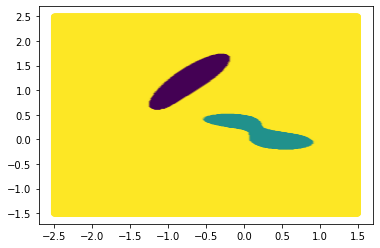

In [8]:
# Import necessary modules 
from sklearn.neighbors import KNeighborsClassifier 

#use KNN classifier to predict states 
knn = KNeighborsClassifier(n_neighbors=10) 
knn.fit(train,target)
color=knn.predict(data)
# print(np.shape(color))
plt.clf()
plt.scatter(data[:,0], data[:,1],c=color[:,0])

In [10]:
import joblib
joblib.dump(knn,'define_state_for_perturb_MB_potential.joblib')

['define_state_for_perturb_MB_potential.joblib']

(11835,)
(11835,)
(148165,)
(148165,)
(11835, 2)
(160000, 2)
(11835, 2)
(160000, 2)
(160000, 2)


<Figure size 432x288 with 0 Axes>

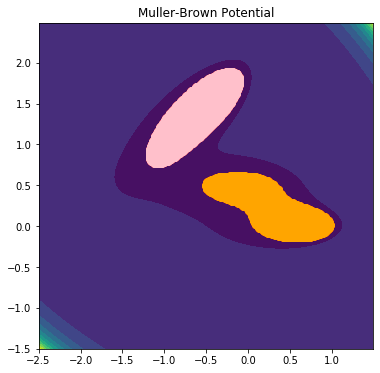

In [161]:
# plot MB potential 
plt.clf()
fig=plt.figure(figsize=(6,6))
X=np.arange (-2.5,1.5,1/100) ; Y=np.arange(-1.5,2.5,1/100)
X, Y = np.meshgrid(X, Y)
Z=np.array(muller_brown_potential(np.ravel(X), np.ravel(Y)))
Z = Z.reshape(X.shape)
ax=fig.add_subplot(111)
ax.contourf(X, Y, Z, 10, linestyles="solid")
ax.set_title('Muller-Brown Potential')


# compute training set 
dc_index=np.where(Z <-60) # define domain and complement 
d_index=np.where(Z>=-60)
x_dc=X[0][dc_index[1]]
y_dc=Y[:,0][dc_index[0]]
print(np.shape(x_dc)); print(np.shape(y_dc))
x_d=X[0][d_index[1]]
y_d=Y[:,0][d_index[0]]
print(np.shape(x_d)); print(np.shape(y_d))
ax.scatter(x_dc, y_dc, c='r')
d=np.stack((x_d,y_d)).T
dc=np.stack((x_dc,y_dc)).T  

a=dc[np.where(dc[:,0]<0)] # define state a and state b 
a=a[np.where(a[:,1]>a[:,0]+np.full(np.shape(a[:,0]),1.4))]
b=dc[np.where(dc[:,0]>-0.8)]
b=b[np.where(b[:,1]<b[:,0]+np.full(np.shape(b[:,0]),1.4))]
ax.scatter(a[:,0], a[:,1],c="pink", label="stateA")
ax.scatter(b[:,0], b[:,1],c="orange", label="stateB")

dc_train = np.vstack((a, b)) # define training and target sets for KNN
print(np.shape(dc_train))
train=np.vstack((d,dc_train))
print(np.shape(train))
dc_target = np.vstack((np.full(np.shape(a),1), np.full(np.shape(b),2)))
print(np.shape(dc_target))
target=np.vstack((np.full(np.shape(d),3),dc_target))
print(np.shape(target))
X=np.arange (-2.5,1.5,1/100) ; Y=np.arange(-1.5,2.5,1/100)
X, Y = np.meshgrid(X, Y)
data=np.vstack((X.ravel(),Y.ravel())).T
print(np.shape(data))

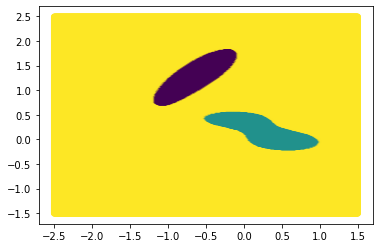

In [13]:
# Import necessary modules 
from sklearn.neighbors import KNeighborsClassifier 

#use KNN classifier to predict states 
knn = KNeighborsClassifier(n_neighbors=10) 
knn.fit(train,target)
color=knn.predict(data)
# print(np.shape(color))
plt.clf()
plt.scatter(data[:,0], data[:,1],c=color[:,0])

In [14]:
import joblib
joblib.dump(knn,'define_state_for_MB_potential.joblib')

['define_state_for_MB_potential.joblib']

In [203]:
#Try importing joblib to make sure they work
loaded_knn=joblib.load('define_state_for_MB_potential.joblib')

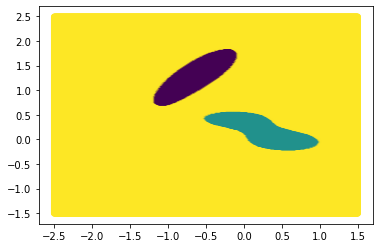

In [19]:
color=loaded_knn.predict(data)
plt.clf()
plt.scatter(data[:,0], data[:,1],c=color[:,0])

In [19]:
loaded_knn=joblib.load('define_state_for_MB_potential.joblib')
X=np.arange (-2.5,1.5,1/1000) ; Y=np.arange(-1.5,2.5,1/1000)
X, Y = np.meshgrid(X, Y)
Z=np.array(muller_brown_potential(np.ravel(X), np.ravel(Y)))
Z = Z.reshape(X.shape)
print(np.shape(Z))

(4000, 4000)


In [20]:
#detect boundary 
boundary_index=[]
for x in range(4000):
    for y in range(4000):
        if Z[x,y]<-59.5 and Z[x,y] > -60.05:
            boundary_index.append([x,y])
boundary_index=np.asarray(boundary_index)
print(np.shape(boundary_index))
find_boundary=np.vstack((X[0][boundary_index[:,1]],Y[:,0][boundary_index[:,0]])).T
print(np.shape(find_boundary))
result=loaded_knn.predict(find_boundary)[:,0]
print(np.shape(result))
boundary=find_boundary[np.where(result==3)]
print(np.shape(boundary))


(15852, 2)
(15852, 2)
(15852,)
(7672, 2)


<Figure size 432x288 with 0 Axes>

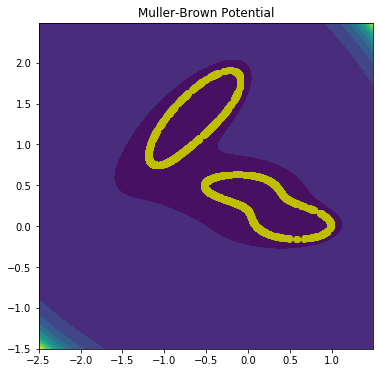

In [21]:
# plot MB potential 
plt.clf()
fig=plt.figure(figsize=(6,6))
X=np.arange (-2.5,1.5,1/100) ; Y=np.arange(-1.5,2.5,1/100)
X, Y = np.meshgrid(X, Y)
Z=np.array(muller_brown_potential(np.ravel(X), np.ravel(Y)))
Z = Z.reshape(X.shape)
ax=fig.add_subplot(111)
ax.contourf(X, Y, Z, 10, linestyles="solid")
ax.set_title('Muller-Brown Potential')

# ax.scatter(X[0][boundary_index[:,1]],Y[:,0][boundary_index[:,0]],c="b")
ax.scatter(boundary[:,0],boundary[:,1],c="y")

np.save("boundary.npy",boundary)


In [24]:
# Import necessary modules 
from sklearn.neighbors import KNeighborsClassifier 

target=np.vstack((range(np.shape(boundary)[0]),range(np.shape(boundary)[0]))).T
print(target)
train=boundary
print(train)
#use KNN classifier to predict states 
knn = KNeighborsClassifier(n_neighbors=10) 
knn.fit(train,target)
joblib.dump(knn,'predict_closest_boundary.joblib')


[[   0    0]
 [   1    1]
 [   2    2]
 ...
 [7669 7669]
 [7670 7670]
 [7671 7671]]
[[ 0.565 -0.155]
 [ 0.575 -0.155]
 [ 0.585 -0.155]
 ...
 [-0.206  1.906]
 [-0.205  1.906]
 [-0.204  1.906]]


['predict_closest_boundary.joblib']